### Classification using VGG

#### Get the data - images of blood sells, fruits


In [1]:
import os

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from keras.layers import Input , Lambda , Dense , Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [2]:
train_path_to = '../fruits-360/Training'
valid_path_to = '../fruits-360/Validation'

In [3]:
IMAGE_SIZE = [100, 100] 

In [4]:
epochs = 5
batch_size = 32

In [5]:
classes = [
  'Apple Golden 1',
  'Avocado',
  'Lemon',
  'Mango',
  'Kiwi',
  'Banana',
  'Strawberry',
  'Raspberry'
]

In [6]:
image_files = glob(train_path_to + '/*/*.jp*g')
valid_image_files = glob(valid_path_to + '/*/*.jp*g')

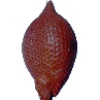

In [7]:
image.image_utils.load_img(np.random.choice(image_files))

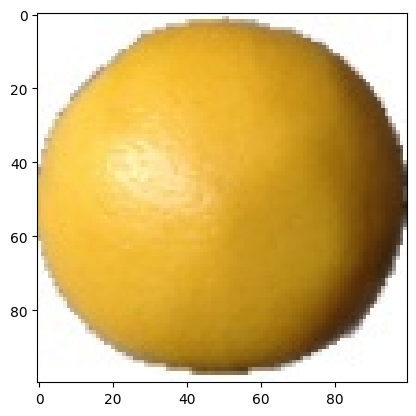

In [8]:
plt.imshow(image.image_utils.load_img(np.random.choice(image_files)))


In [9]:
folders = glob(train_path_to + '/*')

In [10]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False )

In [11]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [12]:
vgg.save("VGG16.h5")

In [13]:
for layer in vgg.layers:
  layer.trainable = False

In [14]:
x = Flatten()(vgg.output)

In [15]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [16]:
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

### Generating image for augmenting training data

In [19]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [20]:
# Get data from training doirectory of frtuits images to augment data
test_gen = gen.flow_from_directory(valid_path_to, target_size=IMAGE_SIZE)

Found 9673 images belonging to 60 classes.


In [21]:
print(test_gen.class_indices)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Carambula': 16, 'Cherry': 17, 'Clementine': 18, 'Cocos': 19, 'Dates': 20, 'Granadilla': 21, 'Grape Pink': 22, 'Grape White': 23, 'Grape White 2': 24, 'Grapefruit Pink': 25, 'Grapefruit White': 26, 'Guava': 27, 'Huckleberry': 28, 'Kaki': 29, 'Kiwi': 30, 'Kumquats': 31, 'Lemon': 32, 'Lemon Meyer': 33, 'Limes': 34, 'Litchi': 35, 'Mandarine': 36, 'Mango': 37, 'Maracuja': 38, 'Nectarine': 39, 'Orange': 40, 'Papaya': 41, 'Passion Fruit': 42, 'Peach': 43, 'Peach Flat': 44, 'Pear': 45, 'Pear Abate': 46, 'Pear Monster': 47, 'Pear Williams': 48, 'Pepino': 49, 'Pineapple': 50, 'Pitahaya Red': 51, 'Plum': 52, 'Pomegranate': 53, 'Quince': 54, 'Raspberry': 55, 'Salak': 56, 'Strawberry': 57

In [22]:
labels = [None] * len(test_gen.class_indices)

In [23]:
for k, v in test_gen.class_indices.items():
  labels[v] = k

In [24]:
labels

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Red',
 'Cactus fruit',
 'Carambula',
 'Cherry',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Litchi',
 'Mandarine',
 'Mango',
 'Maracuja',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach Flat',
 'Pear',
 'Pear Abate',
 'Pear Monster',
 'Pear Williams',
 'Pepino',
 'Pineapple',
 'Pitahaya Red',
 'Plum',
 'Pomegranate',
 'Quince',
 'Raspberry',
 'Salak',
 'Strawberry',
 'Tamarillo',
 'Tangelo']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -102.728546 max: 151.061


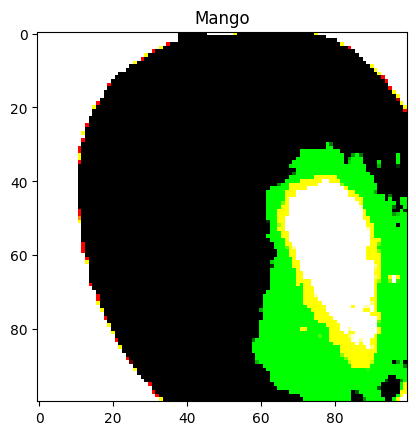

In [25]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [26]:
# create generator for train data
train_generator = gen.flow_from_directory(
  train_path_to,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 28736 images belonging to 60 classes.


In [27]:
# create generator for validation data
valid_generator = gen.flow_from_directory(
  valid_path_to,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 9673 images belonging to 60 classes.


In [28]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)


Epoch 1/5
898/898 [==============================] - 4179s 5s/step - loss: 1.6738 - accuracy: 0.8803 - val_loss: 1.1761 - val_accuracy: 0.9219
Epoch 2/5
898/898 [==============================] - 4144s 5s/step - loss: 0.3131 - accuracy: 0.9720 - val_loss: 0.9073 - val_accuracy: 0.9376
Epoch 3/5
898/898 [==============================] - 4140s 5s/step - loss: 0.1963 - accuracy: 0.9829 - val_loss: 0.6597 - val_accuracy: 0.9600
Epoch 4/5
898/898 [==============================] - 4157s 5s/step - loss: 0.1293 - accuracy: 0.9877 - val_loss: 0.7105 - val_accuracy: 0.9581
Epoch 5/5
898/898 [==============================] - 4177s 5s/step - loss: 0.1079 - accuracy: 0.9897 - val_loss: 0.8724 - val_accuracy: 0.9550


In [29]:

def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


In [35]:
cm = get_confusion_matrix(train_path_to, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path_to, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 28736
Found 28736 images belonging to 60 classes.
2/2 [==============================] - 7s 3s/step
50
2/2 [==============================] - 7s 3s/step
100
2/2 [==============================] - 7s 3s/step
150
2/2 [==============================] - 7s 3s/step
200
2/2 [==============================] - 7s 3s/step
250
2/2 [==============================] - 7s 3s/step
300
2/2 [==============================] - 7s 3s/step
350
2/2 [==============================] - 7s 3s/step
400
2/2 [==============================] - 7s 3s/step
[[445   0   0 ...   0   0   0]
 [  0 489   0 ...   0   0   0]
 [  0   0 489 ...   0   0   0]
 ...
 [  0   0   0 ... 492   0   0]
 [  0   0   0 ...   0 490   0]
 [  0   0   0 ...   0   0 490]]
Generating confusion matrix 9673
Found 9673 images belonging to 60 classes.
2/2 [==============================] - 7s 3s/step
50
2/2 [==============================] - 7s 3s/step
100
2/2 [==============================] - 7s 3s/step
150
1/1 [=======

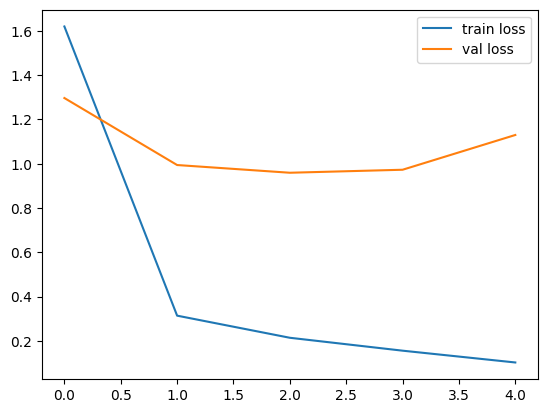

In [30]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

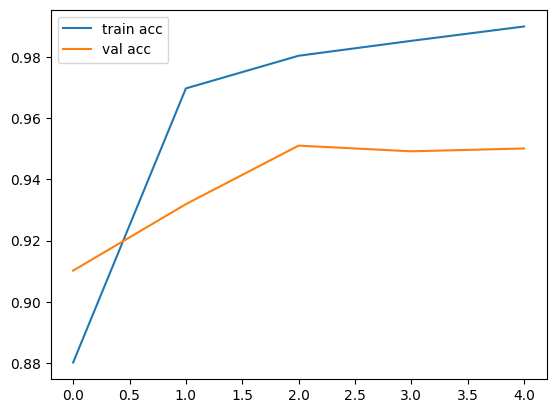

In [31]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.utils' (D:\Anaconda\envs\deeplearning\Lib\site-packages\sklearn\utils\__init__.py)

In [76]:
dir( sklearn)

NameError: name 'sklearn' is not defined

In [ ]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

In [ ]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

### ResNet Model

In [77]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [39]:
IMAGE_SIZE = [100, 100] # feel free to change depending on dataset

# training config:
epochs = 16
batch_size = 32

In [40]:
image_files = glob(train_path_to + '/*/*.jp*g')
valid_image_files = glob(valid_path_to + '/*/*.jp*g')

In [42]:
folders = glob(train_path_to + '/*')

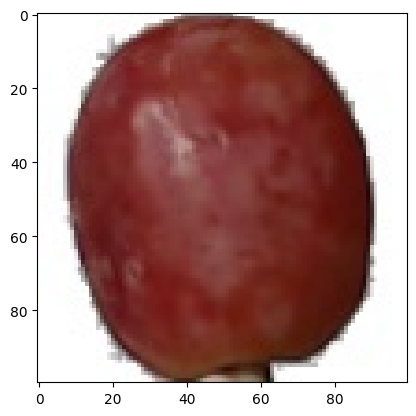

In [44]:
# look at an image for fun
plt.imshow(image.image_utils.load_img(np.random.choice(image_files)))
plt.show()

In [45]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 52s 1us/step


In [46]:
# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [47]:
x = Flatten()(res.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [48]:
model = Model(inputs=res.input, outputs=prediction)

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

In [50]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [51]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [53]:
# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(valid_path_to, target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 9673 images belonging to 60 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Carambula': 16, 'Cherry': 17, 'Clementine': 18, 'Cocos': 19, 'Dates': 20, 'Granadilla': 21, 'Grape Pink': 22, 'Grape White': 23, 'Grape White 2': 24, 'Grapefruit Pink': 25, 'Grapefruit White': 26, 'Guava': 27, 'Huckleberry': 28, 'Kaki': 29, 'Kiwi': 30, 'Kumquats': 31, 'Lemon': 32, 'Lemon Meyer': 33, 'Limes': 34, 'Litchi': 35, 'Mandarine': 36, 'Mango': 37, 'Maracuja': 38, 'Nectarine': 39, 'Orange': 40, 'Papaya': 41, 'Passion Fruit': 42, 'Peach': 43, 'Peach Flat': 44, 'Pear': 45, 'Pear Abate': 46, 'Pear Monster': 47, 'Pear Williams': 48, 'Pepino': 49, 'Pineapple': 50, 'Pitahaya Red': 51, 'Plum': 52, 'Pomegranate': 53, 'Quince': 54, 'Ra

In [54]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-77.91915..151.061].


min: -77.91915 max: 151.061


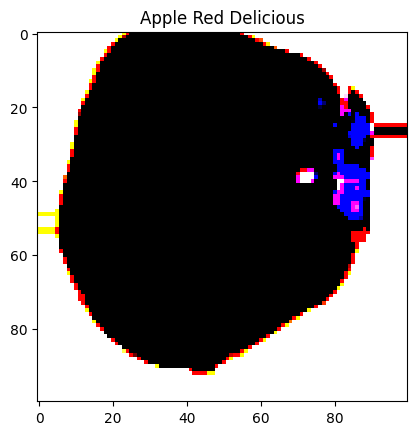

In [55]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [57]:
train_generator = gen.flow_from_directory(
  train_path_to,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 28736 images belonging to 60 classes.


In [58]:
valid_generator = gen.flow_from_directory(
  valid_path_to,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 9673 images belonging to 60 classes.


In [59]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/16
898/898 [==============================] - 1839s 2s/step - loss: 1.1431 - accuracy: 0.9070 - val_loss: 0.6552 - val_accuracy: 0.9482
Epoch 2/16
898/898 [==============================] - 1714s 2s/step - loss: 0.2061 - accuracy: 0.9797 - val_loss: 0.4758 - val_accuracy: 0.9632
Epoch 3/16
898/898 [==============================] - 1710s 2s/step - loss: 0.1330 - accuracy: 0.9870 - val_loss: 0.4794 - val_accuracy: 0.9631
Epoch 4/16
898/898 [==============================] - 1712s 2s/step - loss: 0.0885 - accuracy: 0.9900 - val_loss: 0.1921 - val_accuracy: 0.9830
Epoch 5/16
898/898 [==============================] - 1707s 2s/step - loss: 0.0729 - accuracy: 0.9929 - val_loss: 0.3915 - val_accuracy: 0.9712
Epoch 6/16
898/898 [==============================] - 1681s 2s/step - loss: 0.0736 - accuracy: 0.9930 - val_loss: 0.4098 - val_accuracy: 0.9705
Epoch 7/16
898/898 [==============================] - 1718s 2s/step - loss: 0.0625 - accuracy: 0.9946 - val_loss: 0.4614 - val_accuracy:

In [61]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [65]:
cm = get_confusion_matrix(train_path_to, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path_to, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 28736
Found 28736 images belonging to 60 classes.
2/2 [==============================] - 3s 1s/step
50
2/2 [==============================] - 3s 1s/step
100
2/2 [==============================] - 3s 1s/step
150
2/2 [==============================] - 3s 1s/step
200
2/2 [==============================] - 3s 1s/step
250
2/2 [==============================] - 3s 1s/step
300
2/2 [==============================] - 3s 1s/step
350
2/2 [==============================] - 3s 1s/step
400
2/2 [==============================] - 3s 1s/step
[[481   0   0 ...   0   0   0]
 [  0 492   0 ...   0   0   0]
 [  0   0 492 ...   0   0   0]
 ...
 [  0   0   0 ... 492   0   0]
 [  0   0   0 ...   0 490   0]
 [  0   0   0 ...   0   0 490]]
Generating confusion matrix 9673
Found 9673 images belonging to 60 classes.
2/2 [==============================] - 3s 1s/step
50
2/2 [==============================] - 3s 1s/step
100
2/2 [==============================] - 3s 1s/step
150
1/1 [=======

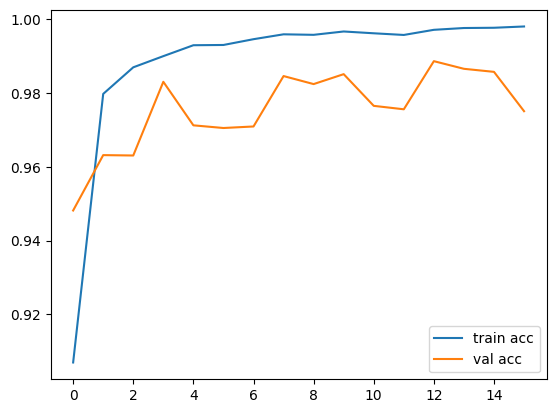

In [67]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [68]:
from util import plot_confusion_matrix
plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

ModuleNotFoundError: No module named 'util'

### Building ResNet from Scratch

In [115]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, \
  Conv2D, BatchNormalization, ZeroPadding2D, MaxPooling2D, Activation, add
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 16
batch_size = 128

In [108]:
# https://www.kaggle.com/paultimothymooney/blood-cells
train_path = '../blood_cell_images/TRAIN'
valid_path = '../blood_cell_images/TEST'

In [109]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [110]:
# useful for getting number of classes
folders = glob(train_path + '/*')

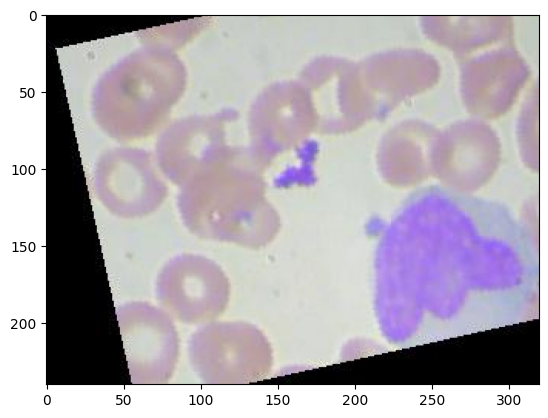

In [116]:
# look at an image for fun
plt.imshow(image.image_utils.load_img(np.random.choice(image_files)))
plt.show()

In [98]:
def identity_block( input_, kernel_size , filters ):
    f1, f2, f3 = filters

    x = Conv2D(f1, (1,1), kernel_initializer='he_normal')(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',
               kernel_initializer='he_normal'    )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1),
            kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)

    x = add([x, input_])
    x = Activation('relu')(x)
    return x

In [99]:
def conv_block(input_,
               kernel_size,
               filters,
               strides=(2, 2)):
    f1, f2, f3 = filters

    x = Conv2D(f1, (1, 1), strides=strides,
               kernel_initializer='he_normal'
    )(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1),
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(f3, (1, 1), strides=strides,
                      kernel_initializer='he_normal'
    )(input_)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [100]:
# our custom resnet
i = Input(shape=IMAGE_SIZE + [3])
x = ZeroPadding2D(padding=(3, 3))(i)
x = Conv2D(64, (7, 7),
           strides=(2, 2),
           padding='valid',
           kernel_initializer='he_normal'
           )(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

In [101]:
import sklearn 

In [102]:
# our layers - you can add more if you want
x = Flatten()(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [103]:
# create a model object
model = Model(inputs=i, outputs=prediction)

In [117]:
# view the structure of the model
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 106, 106, 3)  0          ['input_12[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_38 (Conv2D)             (None, 50, 50, 64)   9472        ['zero_padding2d_12[0][0]']      
                                                                                            

In [118]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [119]:
# create an instance of ImageDataGenerator
def preprocess_input2(x):
  x /= 127.5
  x -= 1.
  return x

train_gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input2
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input2
)

In [120]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, class_mode='sparse')
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 2487 images belonging to 4 classes.
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8980392].


min: -1.0 max: 0.8980392


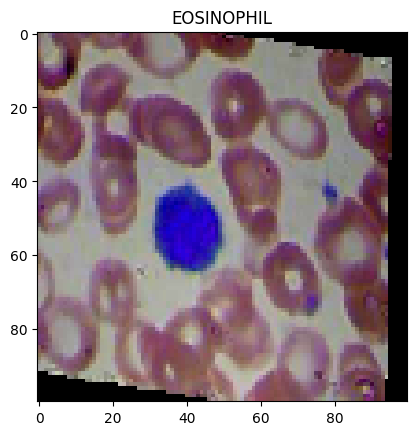

In [121]:
# should be NOT a strangely colored image
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [122]:
# create generators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [ ]:
# fit the model
checkpoint_filepath = '/tmp/checkpoint'
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
  callbacks=[
    tf.keras.callbacks.EarlyStopping(
      monitor='loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True),
  ]

In [124]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in val_gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [125]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

Generating confusion matrix 9957
Found 9957 images belonging to 4 classes.
2/2 [==============================] - 1s 633ms/step
50
2/2 [==============================] - 1s 618ms/step
100
2/2 [==============================] - 2s 819ms/step
150
2/2 [==============================] - 2s 138ms/step
[[   0    0    0    0    3    0    1  153 2340]
 [   0    0    0    0    1    1    0  108 2373]
 [   0    0    0    0    1    0    0  143 2334]
 [   0    0    0    0    2    0    0  147 2350]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]]


In [ ]:
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [126]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
np.trace(cm) / cm.sum()

In [ ]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

In [ ]:
np.trace(valid_cm) / valid_cm.sum()

In [ ]:
Object Dete